## Statistical and Machine Learning, Fall 2024

### Week 9: Implementing Feedforward Neural Networks using Keras and Backpropagation

### Instructor: Farhad Pourkamali 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/farhad-pourkamali/MATH6388Online/blob/main/Week9.ipynb)



### Gradient-based learning
<hr style="border:2px solid gray">

* Neural networks are usually trained by using iterative, gradient-based optimizers such as (stochastic) gradient descent

$$\boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_{t} - \eta_t \nabla J(\boldsymbol{\theta}_{t})$$

* $\boldsymbol{\theta}_{t}$ is the parameter vector at iteration $t$
* $\eta_t$ is the learning rate, determining the step size
* $g_t=\nabla J(\boldsymbol{\theta}_{t})$ is the gradient of the loss function 

* Momentum
    * Introduces a velocity term $v_t$ that keeps track of the historical gradients and helps the optimization algorithm navigate through flat or noisy regions
    
    $$v_{t+1}=\beta v_{t} + g_t\\ \boldsymbol{\theta}_{t+1}=\boldsymbol{\theta}_{t} - \eta_t v_{t+1}$$
    
    * The velocity terms acts like an exponentially weighted moving average of the past gradients
    
    $$v_{t+1}=\beta v_{t} + g_t=\beta \big(\beta v_{t-1} + g_{t-1}\big) + g_t=\beta^2 v_{t-1} + \beta g_{t-1} + g_t$$
    
    $$v_{t+1}=\beta^3 v_{t-2} + \beta^2 g_{t-2} + \beta g_{t-1} + g_t$$
    
    * The "scaling factor" is a geometric series, whose infinite sum is given by ($\beta<1$)
    
    $$1+\beta+\beta^2+\ldots = \sum_{i=0}^\infty \beta^i = \frac{1}{1-\beta}$$
    

### Backprop
<hr style="border:2px solid gray">


* The back-propagation algorithm allows the information from the cost to ﬂow *backward* through the network in order to compute the gradient
    * Utilize the chain rule of calculus to compute the derivatives of functions formed by composing other functions
    * In the next slide, we look at a simplified model

### Backprop and chain rule
<hr style="border:2px solid gray">

* Consider a 3-layer network with one unit in each layer and a scalar input 

<img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/backprop1.png?raw=true\" width=700>

In [1]:
import tensorflow as tf

# Define the function f(u, v)
def f(u, v):
    return 3 * u + 5 * v

# Define values for x and y
x = tf.constant(2.0)
y = tf.constant(3.0)

# Use tf.GradientTape to compute gradients
with tf.GradientTape(persistent=True) as tape:
    # Watch the variables we want to compute gradients with respect to
    tape.watch(x)
    tape.watch(y)
    
    # Define u and v as functions of x and y
    u = 2 * x
    v = x + y

    # Define f as a function of u and v
    result = f(u, v)

# Compute the gradients
df_dx = tape.gradient(result, x)
df_dy = tape.gradient(result, y)


# Print the gradients
print("df/dx:", df_dx.numpy())
print("df/dy:", df_dy.numpy())


df/dx: 11.0
df/dy: 5.0


### Implementing MLPs with Keras

<hr style="border:2px solid gray">

* Keras is a high-level Deep Learning API to build, train, and evaluate all sorts of neural networks
    * Keras runs on top of TensorFlow 2
    * The best way to learn Keras: https://keras.io/
        * Layers 
        * Models: groups layers into an object with training/inference features 
        * Optimizers
        * Losses
        * Metrics

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.15.0


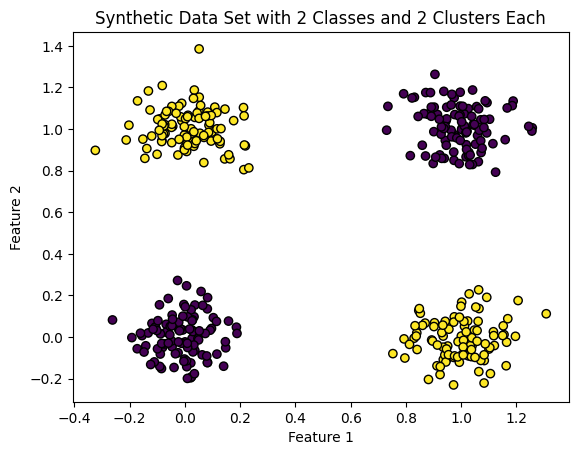

In [3]:
from sklearn.datasets import make_blobs

# Set random seed for reproducibility
np.random.seed(42)

# Create synthetic data set
X, y = make_blobs(n_samples=400, centers=[[0, 0], [0, 1], [1, 0], [1, 1]], cluster_std=.1, random_state=42)

y[y == 0] = 0
y[y == 1] = 1
y[y == 2] = 1
y[y == 3] = 0


# Plot the synthetic data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Synthetic Data Set with 2 Classes and 2 Clusters Each')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()

# Add the input layer and the hidden layer
model.add(Dense(units=2, activation='relu', input_dim=2))  # Assuming 2 input features

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.layers[0].get_weights()

[array([[ 0.5487149 , -0.80584943],
        [ 1.2028033 ,  0.85726726]], dtype=float32),
 array([0., 0.], dtype=float32)]

In [6]:
model.layers[1].get_weights()

[array([[-0.5474127],
        [-0.7635488]], dtype=float32),
 array([0.], dtype=float32)]

In [7]:
model.layers[2].get_weights()

IndexError: list index out of range

In [8]:
model.layers

In [9]:
history = model.fit(X, y, epochs=50, batch_size=8)

Epoch 1/50
16/50 [========>.....................] - ETA: 0s - loss: 0.7110 - accuracy: 0.6094 

2024-10-07 09:27:07.026939: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


50/50 [==============================] - 0s 3ms/step - loss: 0.7240 - accuracy: 0.4225
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.4300
Epoch 3/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.4875
Epoch 4/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4650
Epoch 5/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.4450
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4725
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5200
Epoch 8/50
50/50 [==============================] - 0s 3ms/step - loss: 0.6963 - accuracy: 0.4350
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6958 - accuracy: 0.4600
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.5125
Epoch 11/50
50/50 [===========

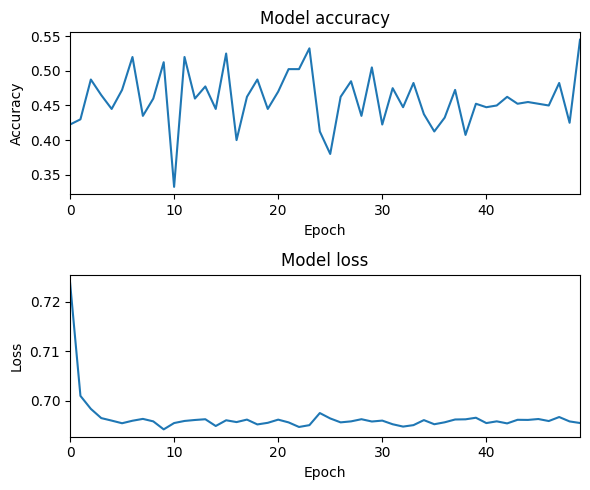

In [10]:
plt.rcParams["figure.figsize"] = (6,5)

fig, axs = plt.subplots(2)
axs[0].plot(history.history['accuracy'])
axs[0].set_title('Model accuracy')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlim([0, 49])

axs[1].plot(history.history['loss'])
axs[1].set_title('Model loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_xlim([0, 49])

plt.tight_layout()

plt.show()

In [11]:
model.layers[0].get_weights()

[array([[ 0.86796635, -0.7570081 ],
        [ 0.9416758 ,  0.28866184]], dtype=float32),
 array([-0.8899449, -0.5045468], dtype=float32)]

In [12]:
model.layers[1].get_weights()

[array([[-0.03968069],
        [-0.05566498]], dtype=float32),
 array([-0.10501923], dtype=float32)]

1/1 [==============================] - 0s 49ms/step


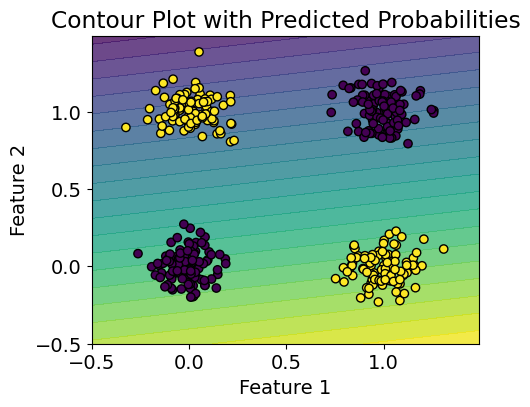

In [13]:
# visualize the classifier 

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,4)})
# Create a mesh grid for the entire feature space
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), 
                     np.arange(y_min, y_max, step))

# Flatten the meshgrid and make predictions
mesh_input = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(mesh_input, batch_size=len(mesh_input))

# Reshape predictions to the shape of the meshgrid
predictions = predictions.reshape(xx.shape)

# Create a contour plot
plt.contourf(xx, yy, predictions, cmap='viridis', levels=20, alpha=0.8)

# Scatter plot of the synthetic data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

plt.title('Contour Plot with Predicted Probabilities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Q1: What happens if we don't use the "sigmoid" activation function?

- https://keras.io/api/layers/core_layers/dense/
- https://keras.io/api/losses/probabilistic_losses/

When `from_logits=True`, the binary crossentropy loss function in Keras will internally apply the sigmoid activation function during the computation of the loss. 

In [14]:
# Define the model
model = Sequential()

# Add the input layer and the hidden layer
model.add(Dense(units=2, activation='elu', input_dim=2))  

# Add the output layer
model.add(Dense(units=1)) # no 'sigmoid' activation 

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X, y, epochs=50, batch_size=8)


Epoch 1/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.7125
Epoch 2/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6525 - accuracy: 0.6325
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6283 - accuracy: 0.6075
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.6047 - accuracy: 0.5850
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5767 - accuracy: 0.6950
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5430 - accuracy: 0.7300
Epoch 7/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7000
Epoch 8/50
50/50 [==============================] - 0s 4ms/step - loss: 0.4485 - accuracy: 0.7975
Epoch 9/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3949 - accuracy: 0.8525
Epoch 10/50
50/50 [==============================] - 0s 4ms/step - loss: 0.3328 - accuracy: 0.9300
Epoch 11/50
50/50 [

1/1 [==============================] - 0s 39ms/step


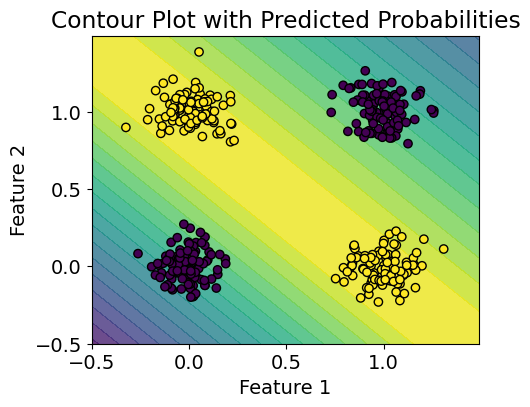

In [15]:
# visualize the classifier 

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,4)})
# Create a mesh grid for the entire feature space
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), 
                     np.arange(y_min, y_max, step))

# Flatten the meshgrid and make predictions
mesh_input = np.c_[xx.ravel(), yy.ravel()]
predictions = model.predict(mesh_input, batch_size=len(mesh_input))

# Reshape predictions to the shape of the meshgrid
predictions = predictions.reshape(xx.shape)

# Create a contour plot
plt.contourf(xx, yy, predictions, cmap='viridis', levels=20, alpha=0.8)

# Scatter plot of the synthetic data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')

plt.title('Contour Plot with Predicted Probabilities')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Q2: How to set aside validation data? 


In [16]:
# Define the model
model = Sequential()

# Add the input layer and the hidden layer
model.add(Dense(units=2, activation='elu', input_dim=2))  

# Add the output layer
model.add(Dense(units=1)) # no 'sigmoid' activation 

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X, y, epochs=50, batch_size=16, validation_split=0.1)

Epoch 1/50


2024-10-07 09:28:33.616734: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


23/23 [==============================] - 0s 13ms/step - loss: 0.7262 - accuracy: 0.5028 - val_loss: 0.7068 - val_accuracy: 0.4750
Epoch 2/50
23/23 [==============================] - 0s 5ms/step - loss: 0.7046 - accuracy: 0.5028 - val_loss: 0.6960 - val_accuracy: 0.4750
Epoch 3/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6949 - accuracy: 0.5028 - val_loss: 0.6895 - val_accuracy: 0.4750
Epoch 4/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5028 - val_loss: 0.6862 - val_accuracy: 0.4750
Epoch 5/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.5028 - val_loss: 0.6862 - val_accuracy: 0.4750
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6805 - accuracy: 0.5028 - val_loss: 0.6796 - val_accuracy: 0.4750
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.6754 - accuracy: 0.5028 - val_loss: 0.6752 - val_accuracy: 0.5000
Epoch 8/50
23/23 [============

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

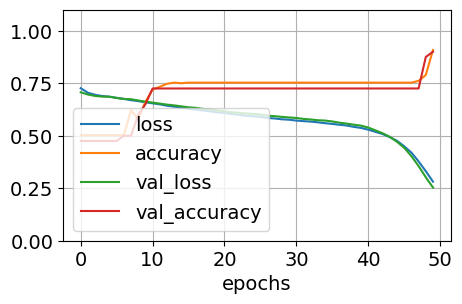

In [18]:
pd.DataFrame(history.history).plot(figsize=(5, 3))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.xlabel('epochs')
plt.show()

### Q3: How to ensure reproducible results? 

- Set random seeds for Python, NumPy, and TensorFlow. This ensures that the random number generation is consistent across runs.
- When creating your Keras model, set the initial weights using a fixed seed. This is especially important if your model architecture involves random weight initialization.
- HeUniform
    - Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / fan_in) (fan_in is the number of input units in the weight tensor).
    - https://keras.io/api/layers/initializers/

In [22]:
seed_value = 4

tf.random.set_seed(seed_value)

# Define the model
model = Sequential()

# Add the input layer and the hidden layer
model.add(Dense(units=2, activation='elu', input_dim=2, 
                kernel_initializer= tf.keras.initializers.HeUniform(seed=seed_value)))  

# Add the output layer
model.add(Dense(units=1, 
          kernel_initializer= tf.keras.initializers.HeUniform(seed=seed_value))) 

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(X, y, epochs=50, batch_size=8, validation_split=0.1, verbose=0)

model.layers[1].get_weights()

2024-10-07 09:31:06.842800: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


[array([[4.040056],
        [4.340963]], dtype=float32),
 array([0.0300595], dtype=float32)]